In [1]:
!pip install tensorflow_datasets

In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout


In [10]:
dataset,info=tfds.load("cats_vs_dogs",with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.1ZSUN4_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [11]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [20]:
class_names=info.features["label"].names
class_names

['cat', 'dog']

In [23]:
for i,example in enumerate(dataset["train"]):
  image,label=example
  save_dir="./cats_vs_dogs/train/{}".format(class_names[label])
  os.makedirs(save_dir,exist_ok=True)
  file_name=save_dir + "/" + "{}_{}.jpg".format(class_names[label],i)
  tf.keras.preprocessing.image.save_img(file_name,image.numpy())

In [27]:
img=plt.imread("/content/cats_vs_dogs/train/dog/dog_10.jpg")

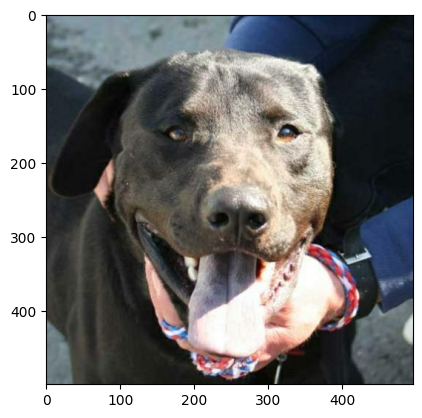

In [28]:
plt.imshow(img)

In [25]:
datagen=ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_gen=datagen.flow_from_directory("/content/cats_vs_dogs/train",target_size=(150,150),batch_size=32,class_mode="binary",subset="training")
validation_gen=datagen.flow_from_directory("/content/cats_vs_dogs/train",target_size=(150,150),batch_size=32,class_mode="binary",subset="validation")


Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [40]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,837,569 (18.45 MB)

 Trainable params: 4,837,121 (18.45 MB)

 Non-trainable params: 448 (1.75 KB)

In [42]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [43]:
history=model.fit(train_gen,epochs=20,validation_data=validation_gen)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 165s 272ms/step - accuracy: 0.5717 - loss: 0.9808 - val_accuracy: 0.6549 - val_loss: 0.6133
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 152s 261ms/step - accuracy: 0.6717 - loss: 0.6000 - val_accuracy: 0.7205 - val_loss: 0.5518
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 165s 284ms/step - accuracy: 0.7158 - loss: 0.5527 - val_accuracy: 0.7104 - val_loss: 0.5925
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 153s 262ms/step - accuracy: 0.7476 - loss: 0.5173 - val_accuracy: 0.7364 - val_loss: 0.5381
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 152s 262ms/step - accuracy: 0.7849 - loss: 0.4644 - val_accuracy: 0.7407 - val_loss: 0.5429
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 201s 260ms/step - accuracy: 0.8078 - loss: 0.4251 - val_accuracy: 0.7730 - val_loss: 0.5364
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 165s 283ms/step - accuracy: 0.8343 - loss: 0.3867 - val_accuracy: 0.8048 - val_loss: 0.4167
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 189s 262ms/step - accuracy: 0.8416 -

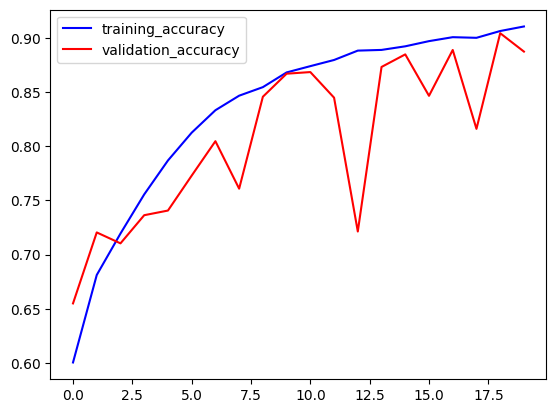

In [44]:
plt.plot(history.history["accuracy"],label="training_accuracy",color="blue")
plt.plot(history.history["val_accuracy"],label="validation_accuracy",color="red")
plt.legend()
plt.show()

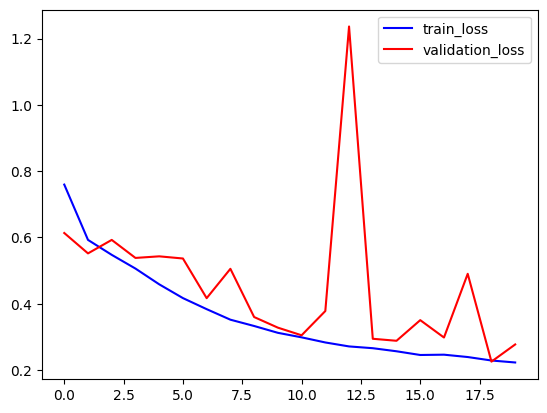

In [45]:
plt.plot(history.history["loss"],label="train_loss",color="blue")
plt.plot(history.history["val_loss"],label="validation_loss",color="red")
plt.legend()
plt.show()

In [47]:
#save model
model.save("cat_vs_dog.h5")

In [49]:
model_load=keras.models.load_model("cat_vs_dog.h5")

In [ ]:
input_img=plt.imread("")

In [89]:
input_img=plt.imread("/content/dog.jpg")

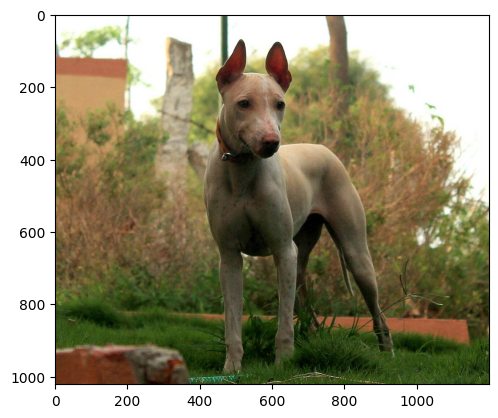

In [90]:
plt.imshow(input_img)

In [91]:
input_img.shape

(1022, 1200, 3)

In [92]:
input_img=cv2.resize(input_img,(150,150))

In [93]:
input_img=input_img.reshape(1,150,150,3)

In [94]:
input_img=input_img/255

In [95]:
output=model.predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [96]:
output

array([[0.86728656]], dtype=float32)

In [97]:
def prediction(output):
  if output[0][0]>=0.5:
    print("Dog")
  else:
    print("Cat")

In [98]:
prediction(output)

Dog


'Path of the image to be predicted:/content/cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cat


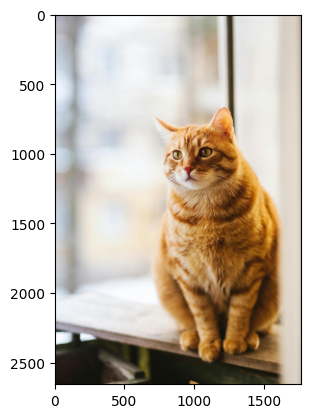

In [99]:
input_path=input("'Path of the image to be predicted:")

input_img=plt.imread(input_path)

plt.imshow(input_img)

input_img=cv2.resize(input_img,(150,150))

input_img=input_img.reshape(1,150,150,3)

input_img=input_img/255

output=model.predict(input_img)

def prediction(output):
  if output[0][0]>=0.5:
    print("Dog")
  else:
    print("Cat")

prediction(output)
